In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav
from scipy.signal import find_peaks
import pickle 
from astropy.io import fits
from spectral_cube import SpectralCube
from astropy import units as u
import numpy.ma as ma
from astropy.stats import sigma_clip
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.colorbar import colorbar
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle
import math
from matplotlib import cm
from astropy.wcs import WCS
import scipy
import scipy.ndimage as ndi
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import pkg_resources
from specutils import Spectrum1D, SpectralRegion
from astropy.modeling import models
from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines
from __future__ import print_function
import pyspeckit
import pylab as pl

463
290
0.089033276
(array([28], dtype=int64), array([30], dtype=int64))
337.3998927243333 -20.799990158994444


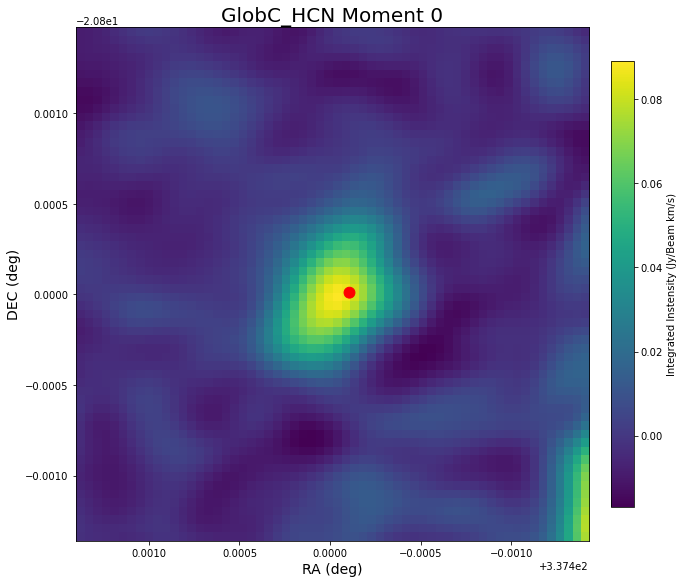

In [3]:
source = 'GlobC_HCN'    
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
    
data1 = data[0,:,:,:]

figure = plt.figure(figsize=[10,10]) #Globule B
    
ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)
    
freq_start = header["CRVAL3"]
freq_inc = header["CDELT3"]

channels = np.arange(header["NAXIS3"])

#define velocity as km/s blocks
frequency = freq_start + (freq_inc * channels)
frequency = np.array(frequency, dtype = float)
    
velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000
vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
#print(vel_inc)
    
x1 = round(header["CRPIX1"]-(ra_start-337.3999871687777)/ra_inc)-1 #Globule C
print(x1)

y1 = round(header["CRPIX2"]-(dec_start+20.799942936772222)/dec_inc)-1 #Globule C
print(y1)

box = 30

data2 = data1[:, :, np.arange(x1-box, x1+box)]
data3 = data2[:, np.arange(y1-box, y1+box), :]
    
integrated = np.sum(data3[:, :, :], axis = 0)*abs(vel_inc)
    
#plt.imshow(integrated, origin = 'lower')
 
max_val = np.nanmax(integrated)
#print(max_val)
    
#a = [x for x in range(len(data1[:, 0, 0]))]
array = [9, 10, 11, 12, 14, 15, 16, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
#for i in range(len(a)):
    #if np.nanmax(data3[a[i], :, :]) > 0*max_val:
        #array.append(a[i])
            
#print(array)
    
moment0 = np.sum(data3[array, :, :], axis = 0)*abs(vel_inc)
    
#print(np.nanmax(data3))
    
max_value = np.nanmax(moment0)
print(max_value)
    
extent=[ra[x1-box],ra[x1+box],dec[y1-box],dec[y1+box]]

print(np.where(moment0 == max_value))
#print(moment0[8, 43])
    
plt.imshow(moment0, origin= 'lower', extent=extent, zorder = 0)

circle1 = plt.Circle((ra[x1+2], dec[y1-1]), 0.00003, color='red', zorder = 1)
plt.gca().add_patch(circle1)

print(ra[x1+2], dec[y1-1])

plt.xticks()
plt.yticks()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.colorbar(label = r'Integrated Instensity (Jy/Beam km/s)', fraction=0.04, pad=0.04)
#plt.clim(0.05, 2.8) #Globule B
#plt.clim(0.0, 1.4) #Globule C
plt.title(source + ' Moment 0', fontsize= 20)
    
plt.show()

In [4]:
diff1 = abs(ra-337.43215)
a = np.where(diff1 == min(diff1))
print(a)
print(ra[a])

diff2 = abs(dec+20.8129)
b = np.where(diff2 == min(diff2))
print(b)
print(dec[b])

(array([0], dtype=int64),)
[337.42185106]
(array([16], dtype=int64),)
[-20.81288183]


Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less
No contour levels were found within the data range.
No contour levels were found within the data range.
No contour levels were found within the data range.
No contour levels were found within the data range.


337.4037166667 -20.800625


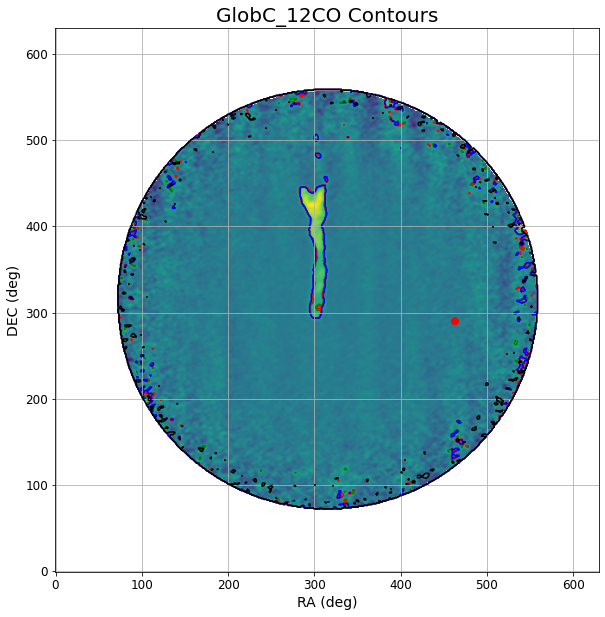

In [5]:
source = 'GlobC_12CO'
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
data1 = data[0,:,:,:]

source2 = 'GlobC_12CO'
path2 = source2 + '.image.pbcor.fits'
cube2 = fits.open(path2)
data2 = cube2[0].data
header2 = cube2[0].header
data1_2 = data2[0,:,:,:]

source3 = 'GlobC_12CO'
path3 = source3 + '.image.pbcor.fits'
cube3 = fits.open(path3)
data3 = cube3[0].data
header3 = cube3[0].header
data1_3 = data3[0,:,:,:]

source4 = 'GlobC_12CO'
path4 = source4 + '.image.pbcor.fits'
cube4 = fits.open(path4)
data4 = cube4[0].data
header4 = cube4[0].header
data1_4 = data4[0,:,:,:]

plt.figure(figsize=[10, 10]) #Globule B
    
ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)
   
integrated = np.sum(data1[:, :, :], axis = 0)
 
max_val = np.nanmax(integrated)
    
array = [24, 25, 26, 29] #CCH
array2 = [9, 10, 11, 12, 14, 15, 16, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] #HCN
array3 = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] #HCOp
array4 = [23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 39, 40, 41, 46, 47, 48, 49] #HNC
    
moment0 = np.sum(data1[array, :, :], axis = 0)
moment0_2 = np.sum(data1_2[array2, :, :], axis = 0)
moment0_3 = np.sum(data1_3[array3, :, :], axis = 0)
moment0_4 = np.sum(data1_4[array4, :, :], axis = 0)
    
extent=[ra[0],ra[-1],dec[0],dec[-1]]
    
sigma_mask = sigma_clip(moment0, sigma=3.5, maxiters=None, cenfunc='mean')
newmask = (moment0 < np.amax(sigma_mask))
    
mom0 = np.ma.array(moment0, mask = newmask)

sigma_mask2 = sigma_clip(moment0_2, sigma=3.5, maxiters=None, cenfunc='mean')
newmask2 = (moment0_2 < np.amax(sigma_mask2))
    
mom0_2 = np.ma.array(moment0_2, mask = newmask2)

sigma_mask3 = sigma_clip(moment0_3, sigma=3.5, maxiters=None, cenfunc='mean')
newmask3 = (moment0_3 < np.amax(sigma_mask3))
    
mom0_3 = np.ma.array(moment0_3, mask = newmask3)

sigma_mask4 = sigma_clip(moment0_4, sigma=3.5, maxiters=None, cenfunc='mean')
newmask4 = (moment0_4 < np.amax(sigma_mask4))
    
mom0_4 = np.ma.array(moment0_4, mask = newmask4)
        
plt.imshow(moment0_2, origin = 'lower', zorder = 0)
plt.contour(newmask, levels = 0, colors='black', origin = "lower", zorder = 2)
plt.contour(newmask2, levels = 0, colors='green', origin = "lower", zorder = 1)
plt.contour(newmask3, levels = 0, colors='red', origin = "lower", zorder = 1)
plt.contour(newmask4, levels = 0, colors='blue', origin = "lower", zorder = 1)

print(ra[463], dec[290])
circle1 = plt.Circle((463, 290), 4, color='red', zorder = 12)
plt.gca().add_patch(circle1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.grid()
#plt.colorbar(label = r'Integrated Instensity ($\mathrm{K\,kms^{-1}}$)', fraction=0.048, pad=0.04)
plt.title(source + ' Contours', fontsize= 20)
plt.show()

In [8]:
path = 'gc_msx_e.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
print(header)

(149, 149)
SIMPLE  =                    T                                                  BITPIX  =                  -64                                                  NAXIS   =                    2                                                  NAXIS1  =                  149                                                  NAXIS2  =                  149                                                  EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H CRPIX1  =               75.907                                                  CRVAL1  =                   0.                                                  CDELT1  =      -0.006666666828                                                  CTYPE1  = 'GLON-CAR'                                                            CRPIX2  =              74.848

In [29]:
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
hdu1 = fits.open(get_pkg_data_filename('galactic_center/gc_2mass_k.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('galactic_center/gc_msx_e.fits'))[0]

Text(0.5, 1.0, 'MSX band E')

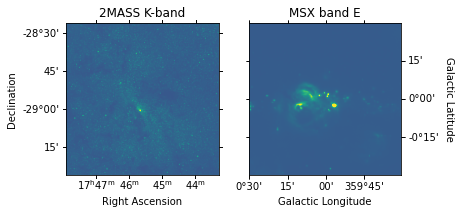

In [30]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-100., vmax=2000.)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('2MASS K-band')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax2.coords['glon'].set_axislabel('Galactic Longitude')
ax2.coords['glat'].set_axislabel('Galactic Latitude')
ax2.coords['glat'].set_axislabel_position('r')
ax2.coords['glat'].set_ticklabel_position('r')
ax2.set_title('MSX band E')

Text(0.5, 1.0, 'MSX band E image footprint')

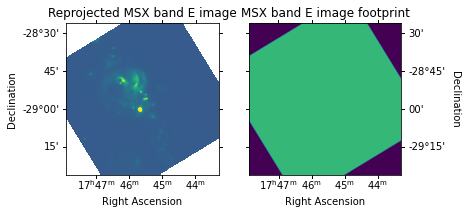

In [32]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt

ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower', vmin=-2.e-4, vmax=5.e-4)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected MSX band E image')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower', vmin=0, vmax=1.5)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('MSX band E image footprint')

Text(0.5, 1.0, 'reproject_adaptive')

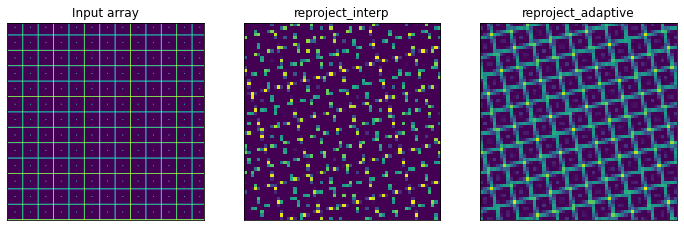

In [47]:
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from reproject import reproject_interp, reproject_adaptive

# Set up initial array with pattern
input_array = np.zeros((256, 256))
input_array[::20, :] = 1
input_array[:, ::20] = 1
input_array[10::20, 10::20] = 1

# Define a simple input WCS
input_wcs = WCS(naxis=2)
input_wcs.wcs.crpix = 128.5, 128.5
input_wcs.wcs.cdelt = -0.01, 0.01

# Define a lower resolution output WCS with rotation
output_wcs = WCS(naxis=2)
output_wcs.wcs.crpix = 30.5, 30.5
output_wcs.wcs.cdelt = -0.0427, 0.0427
output_wcs.wcs.pc = [[0.8, 0.2], [-0.2, 0.8]]

# Reproject using interpolation and adaptive resampling
result_interp, _ = reproject_interp((input_array, input_wcs),
                                    output_wcs, shape_out=(60, 60))
result_deforest, _ = reproject_adaptive((input_array, input_wcs),
                                        output_wcs, shape_out=(60, 60))

plt.figure(figsize = [12, 4])
plt.subplot(1, 3, 1)
plt.imshow(input_array, origin='lower', vmin=0, vmax=1, interpolation='hanning')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.title('Input array')
plt.subplot(1, 3, 2)
plt.imshow(result_interp, origin='lower', vmin=0, vmax=1)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.title('reproject_interp')
plt.subplot(1, 3, 3)
plt.imshow(result_deforest, origin='lower', vmin=0, vmax=0.5)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
plt.title('reproject_adaptive')

In [62]:
source = 'GlobB_13CO'
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header
print(repr(header))

SIMPLE  =                    T /Standard FITS                                   
BITPIX  =                  -32 /Floating point (32 bit)                         
NAXIS   =                    4                                                  
NAXIS1  =                  250                                                  
NAXIS2  =                  250                                                  
NAXIS3  =                   32                                                  
NAXIS4  =                    1                                                  
EXTEND  =                    T                                                  
BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 
BZERO   =   0.000000000000E+00                                                  
BMAJ    =   4.172451554460E-04                                                  
BMIN    =   3.071591824956E-04                                                  
BPA     =   6.575696848988E+

In [63]:
from reproject import reproject_interp
hdu1.header['CTYPE1'] = 'RA---SIN'                                                                                                                       
hdu1.header['CRVAL1'] = 3.374293456831E+02 
hdu1.header['CDELT1'] = -4.722222222222E-05
hdu1.header['CRPIX1'] = 3.010000000000E+02
hdu1.header['CUNIT1'] = 'deg'
hdu1.header['CTYPE2'] = 'DEC--SIN'
hdu1.header['CRVAL2'] = -2.081741557774E+01 
hdu1.header['CDELT2'] = 4.722222222222E-05
hdu1.header['CRPIX2'] = 3.010000000000E+02 
hdu1.header['CUNIT2'] = 'deg'
hdu1.header['NAXIS1'] = 600
hdu1.header['NAXIS2'] = 600
hdu1.header['BITPIX'] = -32
hdu1.header['LONPOLE'] = 1.800000000000E+02 
hdu1.header['BUNIT'] = 'Jy/beam'
hdu1.header['TELESCOP'] = 'ALMA'
hdu1.header['INSTRUME'] = 'ALMA'
hdu1.header['ORIGIN'] = 'CASA 5.1.2-4' 

hdu2.header['CTYPE1'] = 'RA---SIN'
hdu2.header['CRVAL1'] = 3.374293497100E+02                                                  
hdu2.header['CDELT1'] = -5.000000000000E-05                                                  
hdu2.header['CRPIX1'] = 1.260000000000E+02                                                  
hdu2.header['CUNIT1'] = 'deg'                                                            
hdu2.header['CTYPE2'] = 'DEC--SIN'                                                            
hdu2.header['CRVAL2'] = -2.081741516796E+01                                                  
hdu2.header['CDELT2'] = 5.000000000000E-05                                                  
hdu2.header['CRPIX2'] = 1.260000000000E+02                                                  
hdu2.header['CUNIT2'] = 'deg'
hdu2.header['NAXIS1'] = 250                                                  
hdu2.header['NAXIS2'] = 250
hdu2.header['BITPIX'] = -32
hdu2.header['LONPOLE'] = 1.800000000000E+02 
hdu2.header['BUNIT'] = 'Jy/beam'
hdu2.header['TELESCOP'] = 'ALMA'
hdu2.header['INSTRUME'] = 'ALMA'
hdu2.header['ORIGIN'] = 'CASA 5.4.0-70'
print(repr(hdu2.header))

SIMPLE  =                    T                                                  
BITPIX  =                  -32                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  250                                                  
NAXIS2  =                  250                                                  
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRPIX1  =                126.0                                                  
CRVAL1  =         337.42934971                                                  
CDELT1  =               -5E-05                                                  
CTYPE1  = 'RA---SIN'                                                            
CRPIX2  =                126

[11, 12, 13, 26, 27, 28, 29, 30, 36, 37, 38, 39, 40]


Input data contains invalid values (NaNs or infs), which were automatically clipped.
invalid value encountered in less


Text(0.5, 1.0, 'GlobB_HCN Moment 0')

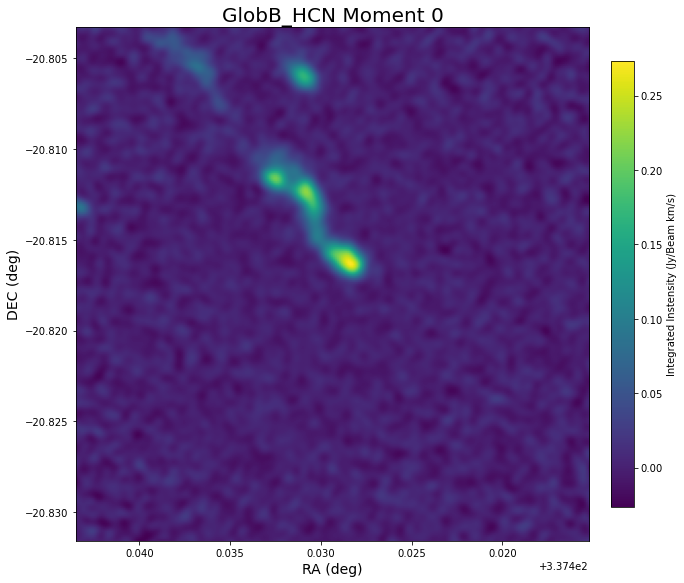

In [80]:
source = 'GlobB_HCN'
path = source + '.image.pbcor.fits'
cube = fits.open(path)
data = cube[0].data
header = cube[0].header

source2 = 'GlobB_HCN'
path2 = source2 + '.image.pbcor.fits'
cube2 = fits.open(path2)
data2 = cube2[0].data
header2 = cube2[0].header
    
data1 = np.squeeze(data, axis=0)

figure = plt.figure(figsize=[10,10]) #Globule B
    
ra_start = header["CRVAL1"]
ra_inc = header["CDELT1"]

channels = np.arange(header["NAXIS1"]) - header["CRPIX1"]+1

ra = ra_start + (ra_inc * channels)
ra = np.array(ra, dtype = float)

dec_start = header["CRVAL2"]
dec_inc = header["CDELT2"]

channels1 = np.arange(header["NAXIS2"]) - header["CRPIX2"]+1

dec = dec_start + (dec_inc * channels1)
dec = np.array(dec, dtype = float)
    
freq_start = header["CRVAL3"]
freq_inc = header["CDELT3"]

channels = np.arange(header["NAXIS3"])

#define velocity as km/s blocks
frequency = freq_start + (freq_inc * channels)
frequency = np.array(frequency, dtype = float)
    
velocity = 3e8*(-(frequency/header["RESTFRQ"])+1)/1000

vel_inc = 3e8*(-(header["CDELT3"]/header["RESTFRQ"]))/1000
#print(vel_inc)
    
x1 = round(header["CRPIX1"]-(ra_start-337.434)/ra_inc)-1 #Globule B
#x1 = round(header["CRPIX1"]-(ra_start-337.409)/ra_inc)-1 #Globule C
#print(x1)
x2 = round(header["CRPIX1"]-(ra_start-337.427)/ra_inc)-1 #Globule B
#x2 = round(header["CRPIX1"]-(ra_start-337.406)/ra_inc)-1 #Globule C
#print(x2)
y1 = round(header["CRPIX2"]-(dec_start+20.818)/dec_inc)-2 #Globule B
#y1 = round(header["CRPIX2"]-(dec_start+20.801)/dec_inc)-1 #Globule C
#print(y1)
y2 = round(header["CRPIX2"]-(dec_start+20.812)/dec_inc)-2 #Globule B
#y2 = round(header["CRPIX2"]-(dec_start+20.796)/dec_inc)-1 #Globule C
#print(y2)
    
data2 = data1[:, :, np.arange(x1, x2)]
data3 = data2[:, np.arange(y1, y2), :]
    
integrated = np.sum(data3[:, :, :], axis = 0)*abs(vel_inc)
    
#plt.imshow(integrated, origin = 'lower')
 
max_val = np.nanmax(integrated)
#print(max_val)
    
a = [x for x in range(len(data1[:, 0, 0]))]
array = []
for i in range(len(a)):
    if np.nanmax(data3[a[i], :, :]) > 0.15*max_val:
        array.append(a[i])
            
print(array)
    
moment0 = np.sum(data1[array, :, :], axis = 0)
    
max_value = np.nanmax(moment0)
    
extent=[ra[0],ra[-1],dec[0],dec[-1]]
    
sigma_mask = sigma_clip(moment0, sigma=3, maxiters=None, cenfunc='mean')
newmask = (moment0 < np.amax(sigma_mask))
    
mom0 = np.ma.array(moment0, mask = newmask)*abs(vel_inc)
        
#plt.imshow(mom0, origin= 'lower', extent=extent, zorder = 0)

new_header = cube[0].header.copy()
new_header['CTYPE1'] = 'GLON-TAN'
    
array, footprint = reproject_interp((moment0, hdu1.header), hdu2.header)
plt.imshow(array, origin='lower', extent = extent)

plt.xticks()
plt.yticks()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
plt.colorbar(label = r'Integrated Instensity (Jy/Beam km/s)', fraction=0.04, pad=0.04)
#plt.clim(0.05, 2.8) #Globule B
#plt.clim(0.0, 1.4) #Globule C
plt.title(source + ' Moment 0', fontsize= 20)